# Péndulo amortiguado forzado

$$ \frac{d^2 \theta}{dt^2} =\dfrac{-g}{l}sin(\theta)-\dfrac{b}{m}\dfrac{d\theta}{dt}+\dfrac{1}{ml}F(t)$$
$$ \frac{d^2 \theta}{dt^2} + 2\beta\dfrac{d\theta}{dt}+\omega_0^2 sin(\theta)=A \omega_0^2 cos(\omega_1 t) $$

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
import seaborn as sns
sns.set()

In [47]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [48]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [49]:
A=.2
omega1=2*np.pi
omega0=omega1*1.5
beta=omega0/4

#Con F0=Acos(omega1 t)

tiempo=np.linspace(0,10,2000)
def pendulo(var,t,A):
    theta=var[0]
    dtheta=var[1]
    return [dtheta,A*omega0**2*np.cos(omega1*t)-omega0**2*np.sin(theta)-2*beta*dtheta]

In [50]:
sol=odeint(pendulo,[np.pi*1.5,0],tiempo,args=(A,)).T

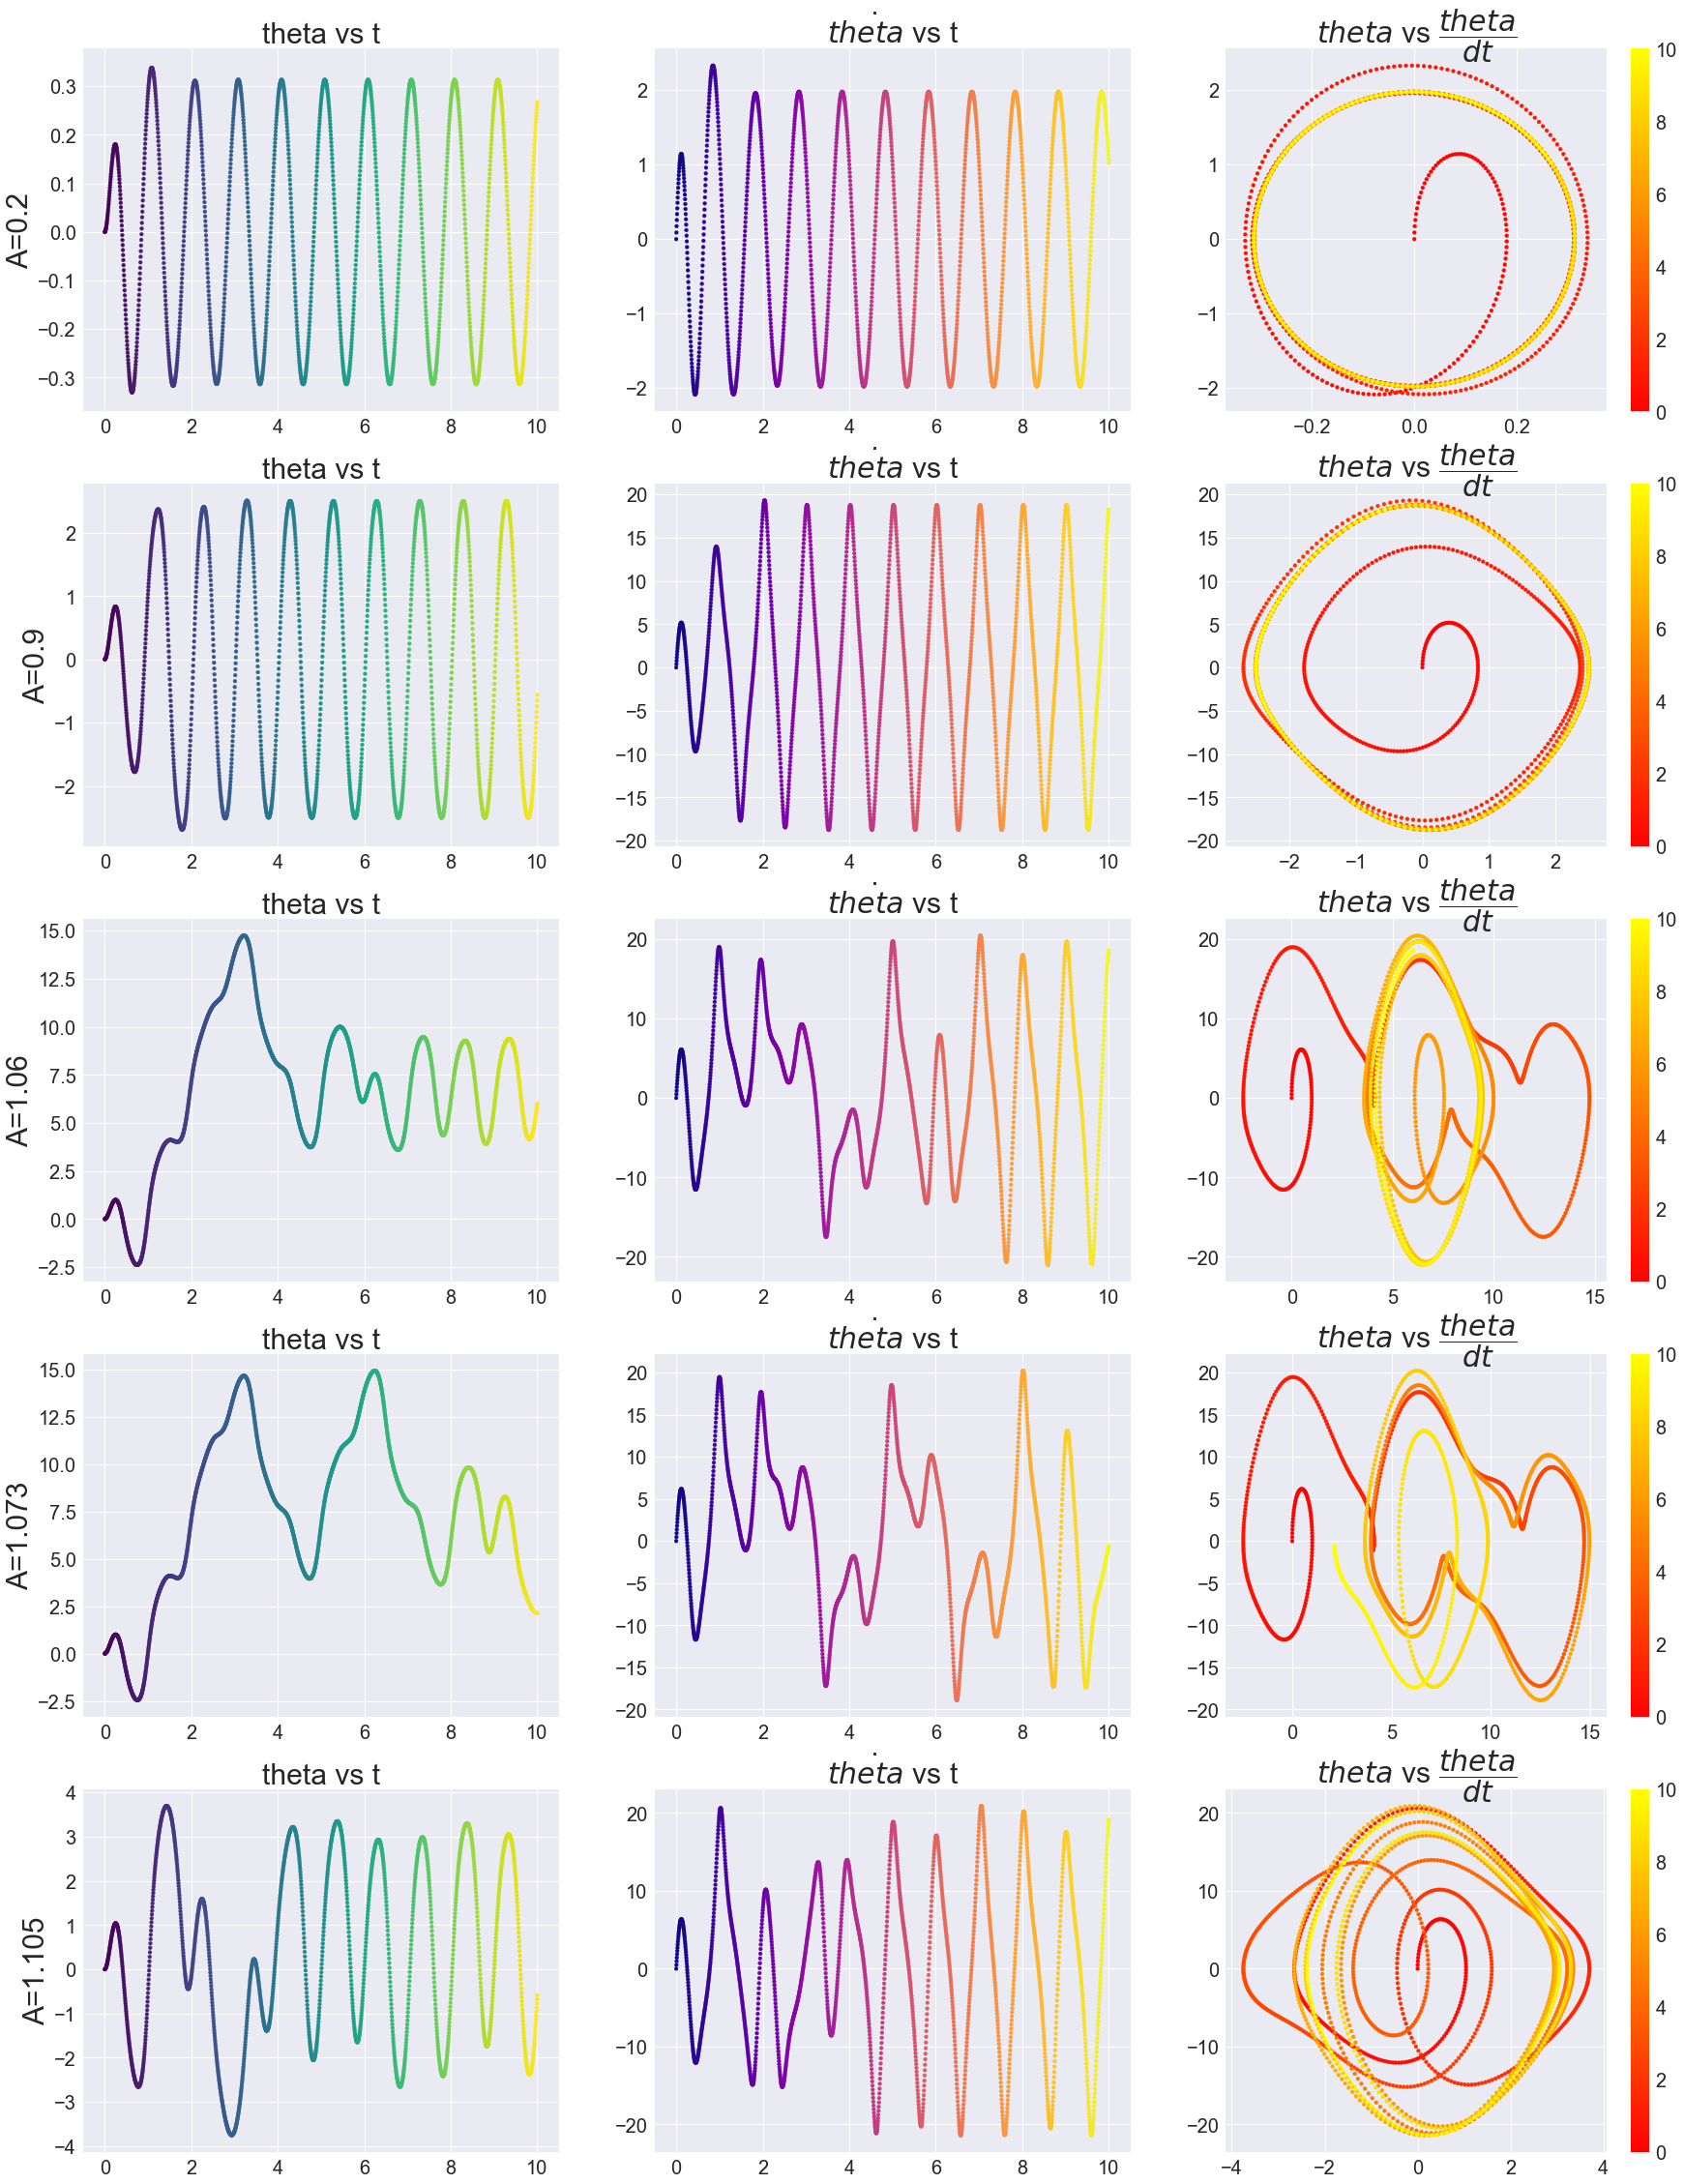

In [52]:
fig, axs = plt.subplots(5, 3,figsize=(30,40))   
As=[.2,.9,1.06,1.073,1.105]
for i in range(5):
    c=str(As[i])
    sol=odeint(pendulo,[0,0],tiempo,args=(As[i],)).T
    axs[i,0].scatter(tiempo,sol[0],s=15,c=tiempo,cmap='viridis')
    axs[i,0].set_ylabel('A={}'.format(c),fontsize=30)
    axs[i,0].set_title('theta vs t',fontsize=30)
    axs[i,1].scatter(tiempo,sol[1],s=15,c=tiempo,cmap='plasma')
    axs[i,1].set_title('$\dot{ theta}$ vs t',fontsize=30)
    axs3=axs[i,2].scatter(sol[0],sol[1],s=15,c=tiempo,cmap='autumn')
    fig.colorbar(axs3,ax=axs[i,2])
    axs[i,2].set_title('$ theta $ vs $\dfrac{theta}{dt}$',fontsize=30)

### Animacion con A=1.073

In [53]:
%matplotlib notebook

In [54]:
sol1=odeint(pendulo,[0,0],tiempo,args=(1.073,)).T
l=9.81/omega0**2
x1=l*np.sin(sol1[0])
y1=-l*np.cos(sol1[0])

<IPython.core.display.Javascript object>


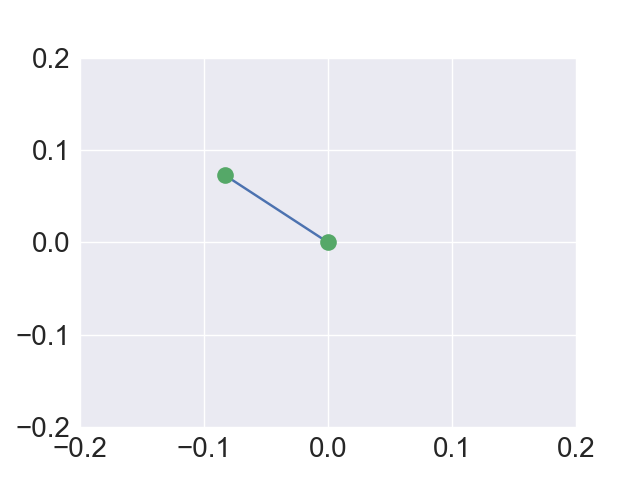

In [55]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(-.2,.2), ylim=(-.2,.2))
#ax.plot((-1.5,1.5),(0,0))
linea, =ax.plot([0,x1[0]],[0,y1[0]])
pendulo1,=ax.plot([x1[0]],[y1[0]],'o',markersize=12)
def animate4(i):
    pendulo1.set_data([0,x1[i]],[0,y1[i]])
    return pendulo1,
def animate5(i):
    linea.set_data([0,x1[i]],[0,y1[i]])
    return linea,

anim = animation.FuncAnimation(fig,animate4,2000,interval=5)
anim2= animation.FuncAnimation(fig,animate5,2000,interval=5)
plt.show()

In [56]:
Posición=go.Scatter(x=tiempo,y=sol1[0],name='Angulo')
Fuerza=go.Scatter(x=tiempo,y=1.073*omega0**2*np.cos(omega1*tiempo),name='Fuerza')
Velocidad=go.Scatter(x=tiempo,y=sol1[1],name='Velocidad angular')
plotly.offline.iplot([Posición,Fuerza,Velocidad])

### Animacion con A=1.105

In [57]:
sol2=odeint(pendulo,[0,0],tiempo,args=(1.105,)).T
x2=l*np.sin(sol2[0])
y2=-l*np.cos(sol2[0])

<IPython.core.display.Javascript object>


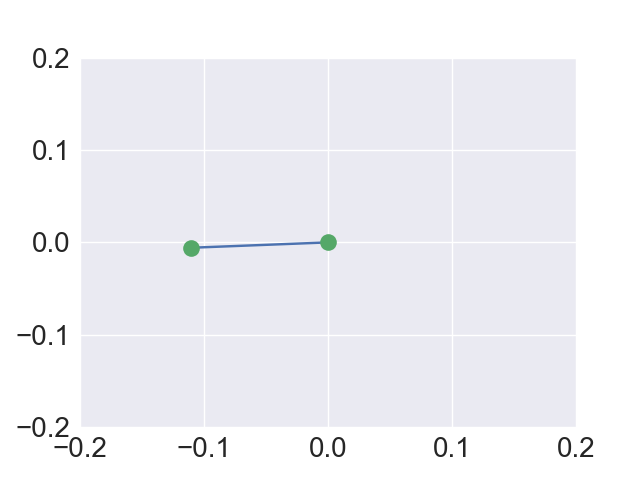

In [58]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(-.2,.2), ylim=(-.2,.2))
#ax.plot((-1.5,1.5),(0,0))
linea, =ax.plot([0,x2[0]],[0,y2[0]])
pendulo2,=ax.plot([x2[0]],[y2[0]],'o',markersize=12)
def animate4(i):
    pendulo2.set_data([0,x2[i]],[0,y2[i]])
    return pendulo2,
def animate5(i):
    linea.set_data([0,x2[i]],[0,y2[i]])
    return linea,

anim = animation.FuncAnimation(fig,animate4,2000,interval=5)
anim2= animation.FuncAnimation(fig,animate5,2000,interval=5)
plt.show()

# Péndulo doble

In [17]:
%matplotlib notebook
import numpy as np
from numpy import sin,cos
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact
import seaborn as sns
sns.set(style="ticks")

### El movimiento con respecto a $\theta_1$ 

$$\frac{\partial L}{\partial \dot \theta _1}=m_1l^2_1\dot\theta_1 + m_2l^2_1\dot\theta_1 + m_2l_1l_2\dot\theta_2\cos(\theta_1-\theta_2)$$

$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot \theta_1}\right) = (m_1 + m_2)l^2_1\ddot\theta_1 + m_2l_1l_2\ddot\theta_2 \cos(\theta_1 - \theta_2)-m_2l_1l_2\dot\theta_2\sin(\theta_1 - \theta_2)(\dot\theta_1-\dot\theta_2) $$

$$\frac{\partial L}{\partial \theta_1}=-l_1g(m_1+m_2)\sin(\theta_1)-m_2l_1l_2\dot\theta_1\dot\theta_2sin(\theta_1-\theta_2)$$

### El movimineto con respecto a $\theta_2$

$$\frac{\partial L}{\partial \dot \theta _2}=m_2l^2_2\dot\theta_2 + m_2l_1l_2\dot\theta_1\cos(\theta_1-\theta_2)$$

$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot \theta_2}\right)= m_2l^2_2\ddot\theta_2 + m_2l_1l_2\ddot\theta_1\cos(\theta_1 - \theta_2) - m_2l_1l_2\dot\theta_1\sin(\theta_1-\theta_2)(\dot\theta_1 - \dot\theta_2)$$

$$\frac{\partial L}{\partial \theta_2}=m_2l_1l_2\dot\theta_1\dot\theta_2\sin(\theta_1-\theta_2) - l_2m_2g\sin(\theta_2)$$

### Sea el lagrangiano:

$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot \theta}\right) = \frac{\partial L}{\partial \theta}$$

$$(m_1 + m_2)l_1\ddot \theta_1 + m_2l_2\ddot\theta_2 \cos(\theta_1 - \theta_2) + m_2l_2\dot\theta^2_2\sin(\theta_1 - \theta_2) + g(m_1 + m_2)\sin(\theta_1)=0$$
y 
$$m_2l_2\ddot\theta_2 + m_2l_1\ddot\theta_1\cos(\theta_1-\theta_2)-m_2l_1\dot\theta^2_1\sin(\theta_1 - \theta_2)+m_2g\sin(\theta_2)=0$$

### Resolviendo para $\ddot\theta_1$ y $\ddot \theta_2$

$$\ddot \theta = \frac{m_2l_1\dot\theta^2_1\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)-gm_2\sin(\theta_2)\cos(\theta_1-\theta_2)+m_2l_2\dot \theta^2_2\sin(\theta_1-\theta_2)+(m_1+m_2)g\sin(\theta_1)}{m_2l_1\cos^2(\theta_1-\theta_2)-l_1(m_1+m_2)}$$

$$\ddot \theta_2= \frac{m_2l_2\dot \theta^2_2 \sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)+g\sin(\theta_1)\cos(\theta_1-\theta_2)(m_1+m_2)+l_1\dot \theta^2_1\sin(\theta_1-\theta_2)(m_1+m_2)-g\sin(\theta_2)(m_1+m_2)}{l_2(m_1+m_2)-m_2l_2\cos^2(\theta_1-\theta_2)}$$


In [2]:
def dbpendulo(y,t):
    # ds
    teta,alfa,omega,beta=y
    
    difs=teta-alfa
    ms=m_1+m_2
    
    #ys
    dfunc=[omega,beta,
           (m_2*l_1*omega**2*sin(difs)*cos(difs)-
            g*m_2*sin(alfa)*cos(difs)+
            m_2*l_2*beta**2*sin(difs)+
            ms*g*sin(teta))/(m_2*l_1*cos(difs)**2-l_1*ms),
           
           (m_2*l_2*beta**2*sin(difs)*cos(difs)+
            g*sin(teta)*cos(difs)*ms+
            l_1*ms*sin(difs)*omega**2-
            sin(alfa)*g*ms)/(-m_2*l_2*cos(difs)**2+l_2*ms) ]
    return dfunc

In [15]:
# function values
m_1,m_2,l_1,l_2,g=1,1,1,1,9.8
dt = 0.05
t = np.arange(0, 20, dt)

# initial state
y_in = np.radians([100, .01, -30, .01])

# solve for teta,alfa,omega and beta
yen = odeint(dbpendulo, y_in, t)

# Asigne values to plot
x,y,xt,yt=yen.T

# Gráficos

<IPython.core.display.Javascript object>


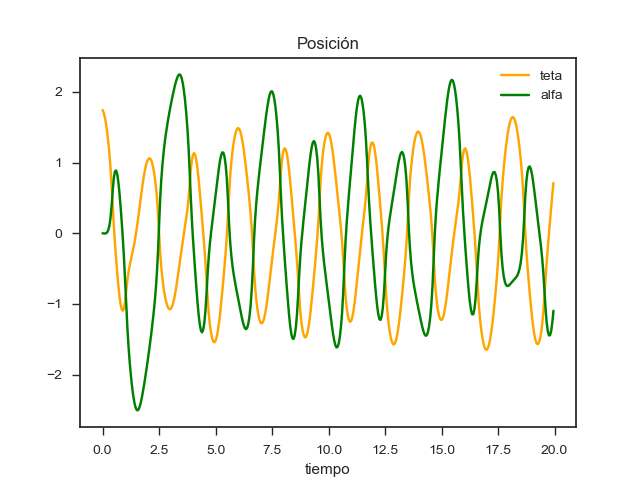

<IPython.core.display.Javascript object>


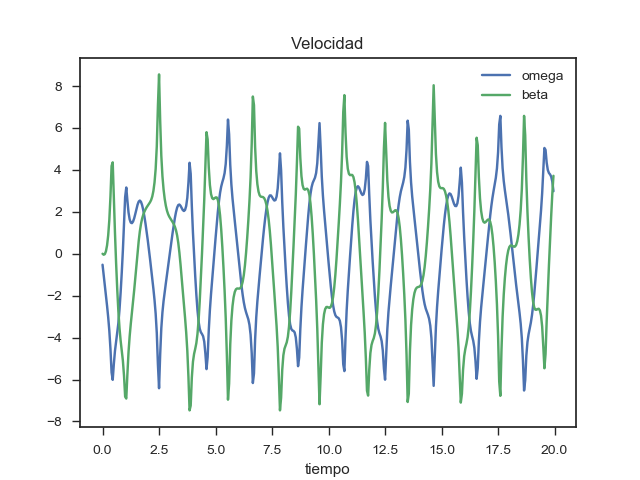

In [16]:
plt.figure()
plt.plot(t,x,label='teta', c='orange')
plt.plot(t,y, label='alfa', c='green')
plt.xlabel('tiempo')
plt.title('Posición')
plt.legend()
plt.figure()
plt.plot(t,xt, label='omega')
plt.plot(t,yt, label='beta')
plt.xlabel('tiempo')
plt.title('Velocidad')
plt.legend()

<IPython.core.display.Javascript object>


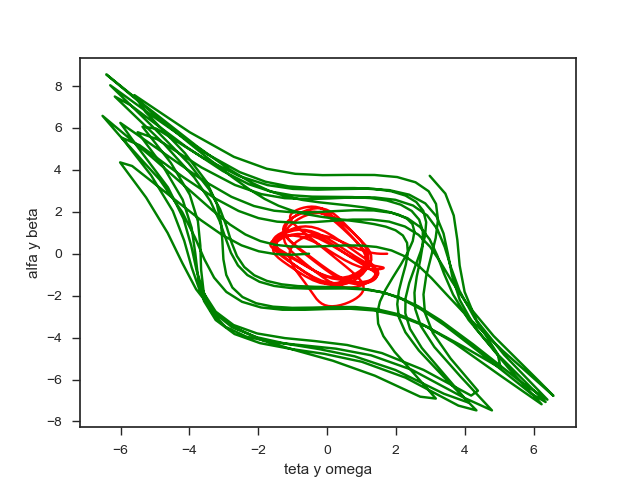

In [8]:
plt.figure()
plt.plot(x,y, c= 'red')
plt.plot(xt,yt, c='green')
plt.xlabel('teta y omega')
plt.ylabel('alfa y beta')
plt.show();

<IPython.core.display.Javascript object>


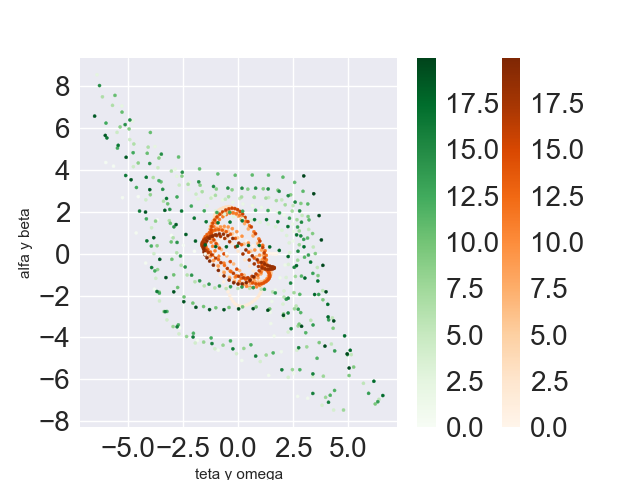

Text(0,0.5,'alfa y beta')

In [63]:
fig,ax = plt.subplots()
f1=ax.scatter(x,y, c= t,cmap='Oranges',s=5)
f2=ax.scatter(xt,yt, c=t,cmap='Greens',s=5)
cb1 = plt.colorbar(f1)
cb2 = plt.colorbar(f2)
plt.xlabel('teta y omega')
plt.ylabel('alfa y beta')

In [64]:
def widgete(m_1,m_2,l_1,l_2):
    # function values
    m_1,m_2,l_1,l_2,g=1,1,1,1,9.8
    dt = 0.05
    t = np.arange(0, 20, dt)

    # initial state
    y_in = np.radians([100, .01, -30, .01])

    # solve for teta, omega, alfa and omega
    yen = odeint(dbpendulo, y_in, t)

    # Asigne values to plot
    x,y,xt,yt=yen.T
    
    plt.figure()
    plt.plot(t,x, c='orange')
    plt.figure()
    plt.plot(t,y, c='green')
    
interact(widgete, m_1=(1,10,1),m_2=(1,10,1), l_1=(1,10,1),l_2=(1,10,1));    
    

interactive(children=(IntSlider(value=5, description='m_1', max=10, min=1), IntSlider(value=5, description='m_…

# Animación 

<IPython.core.display.Javascript object>


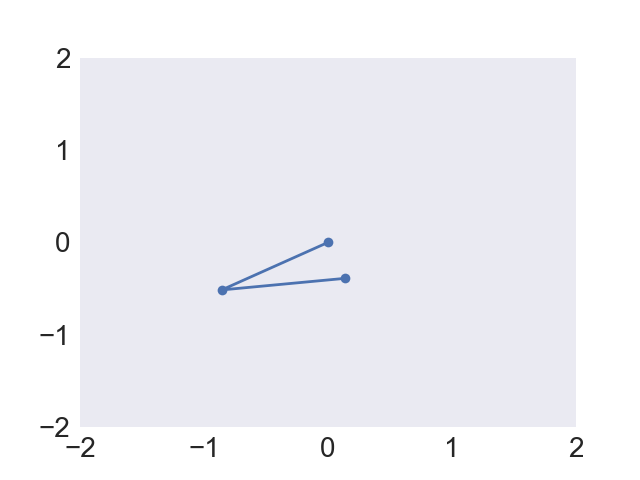

In [65]:

x1 = l_1*sin(yen[:, 0])
y1 = -l_1*cos(yen[:, 0])

x2 = l_2*sin(yen[:, 1]) + x1
y2 = -l_2*cos(yen[:, 1]) + y1

# ax values
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
# initial state
def init():
    line.set_data([], [])
    return line 
# animation by i parameter with x & y
def animate(i):
    exes = [0, x1[i], x2[i]]
    yeses = [0, y1[i], y2[i]]
    line.set_data(exes, yeses)
    return line 

#ani = animation.FuncAnimation(fig, animate, np.arange(1, len(yen)),interval=25, blit=True, init_func=init)
ani = animation.FuncAnimation(fig, animate,frames=500,interval=40, blit=True, init_func=init)
plt.show()

In [66]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
sns.set_style({'axes.grid' : False})

In [67]:
y_ina = np.radians([100, .01, -30, .01])
y_inb = np.radians([50, 30, 60, .01])
y_inc = np.radians([100, 275, 90, 40])
y_ind = np.radians([120, 110, -30, 2])
y_ine = np.radians([100, -50, 50, 125])
y_inf = np.radians([90, 123, 123, 75])
yena = odeint(dbpendulo, y_ina, t)
yenb = odeint(dbpendulo, y_inb, t)
yenc = odeint(dbpendulo, y_inc, t)
yend = odeint(dbpendulo, y_ind, t)
yene = odeint(dbpendulo, y_ine, t)
yenf = odeint(dbpendulo, y_inf, t)
x1a = l_1*sin(yena[:, 0])
y1a = -l_1*cos(yena[:, 0])
x2a = l_2*sin(yena[:, 1]) + x1a
y2a= -l_2*cos(yenb[:, 1]) + y1a
x1b = l_1*sin(yenb[:, 0])
y1b = -l_1*cos(yenb[:, 0])
x2b = l_2*sin(yenb[:, 1]) + x1b
y2b= -l_2*cos(yenb[:, 1]) + y1b
x1c = l_1*sin(yenc[:, 0])
y1c = -l_1*cos(yenc[:, 0])
x2c = l_2*sin(yenc[:, 1]) + x1c
y2c= -l_2*cos(yenc[:, 1]) + y1c
x1d = l_1*sin(yend[:, 0])
y1d = -l_1*cos(yend[:, 0])
x2d = l_2*sin(yend[:, 1]) + x1d
y2d= -l_2*cos(yend[:, 1]) + y1d
x1e = l_1*sin(yene[:, 0])
y1e = -l_1*cos(yene[:, 0])
x2e = l_2*sin(yene[:, 1]) + x1e
y2e= -l_2*cos(yene[:, 1]) + y1e
x1f = l_1*sin(yenf[:, 0])
y1f = -l_1*cos(yenf[:, 0])
x2f = l_2*sin(yenf[:, 1]) + x1f
y2f= -l_2*cos(yenf[:, 1]) + y1f

<IPython.core.display.Javascript object>


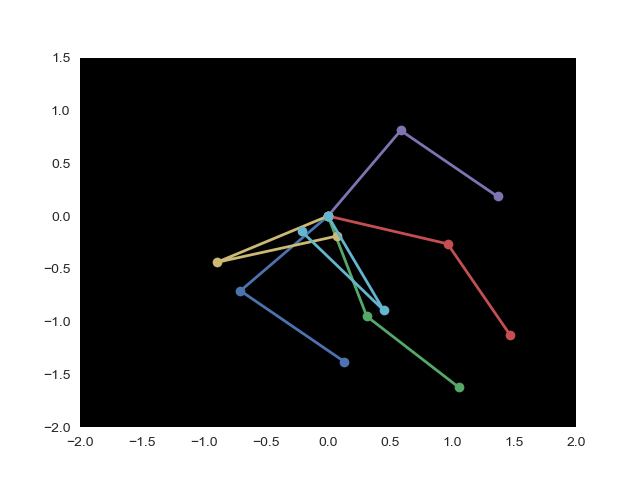

In [68]:
# ax values
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 1.5))

linea, = ax.plot([], [], 'o-', lw=2)
lineb, = ax.plot([], [], 'o-', lw=2)
linec, = ax.plot([], [], 'o-', lw=2)
lined, = ax.plot([], [], 'o-', lw=2)
linee, = ax.plot([], [], 'o-', lw=2)
linef, = ax.plot([], [], 'o-', lw=2)
# initial state
def inita():
    linea.set_data([], [])
    return linea
def initb():
    lineb.set_data([], [])
    return lineb
def initc():
    linec.set_data([], [])
    return linec
def initd():
    lined.set_data([], [])
    return lined
def inite():
    linee.set_data([], [])
    return linee
def initf():
    linef.set_data([], [])
    return linef
# animation by i parameter with x & y
def animatea(i):
    exesa = [0, x1a[i], x2a[i]]
    yesesa = [0, y1a[i], y2a[i]]
    linea.set_data(exesa, yesesa)
    return linea
def animateb(i):
    exesb = [0, x1b[i], x2b[i]]
    yesesb = [0, y1b[i], y2b[i]]
    lineb.set_data(exesb, yesesb)
    return lineb
def animatec(i):
    exesc = [0, x1c[i], x2c[i]]
    yesesc = [0, y1c[i], y2c[i]]
    linec.set_data(exesc, yesesc)
    return linec
def animated(i):
    exesd = [0, x1d[i], x2d[i]]
    yesesd = [0, y1d[i], y2d[i]]
    lined.set_data(exesd, yesesd)
    return lined
def animatee(i):
    exese = [0, x1e[i], x2e[i]]
    yesese = [0, y1e[i], y2e[i]]
    linee.set_data(exese, yesese)
    return linee
def animatef(i):
    exesf = [0, x1f[i], x2f[i]]
    yesesf = [0, y1f[i], y2f[i]]
    linef.set_data(exesf, yesesf)
    return linef

#ani = animation.FuncAnimation(fig, animate, np.arange(1, len(yen)),interval=25, blit=True, init_func=init)
ania = animation.FuncAnimation(fig, animatea,frames=500,interval=40, blit=True, init_func=inita)
anib = animation.FuncAnimation(fig, animateb,frames=500,interval=40, blit=True, init_func=initb)
anic = animation.FuncAnimation(fig, animatec,frames=500,interval=40, blit=True, init_func=initc)
anid = animation.FuncAnimation(fig, animated,frames=500,interval=40, blit=True, init_func=initd)
anie = animation.FuncAnimation(fig, animatee,frames=500,interval=40, blit=True, init_func=inite)
anif = animation.FuncAnimation(fig, animatef,frames=500,interval=40, blit=True, init_func=initf)
plt.show()

In [71]:
teta1=go.Scatter(x=t,y=yena[:,0],name='Pendulo 1')
teta2=go.Scatter(x=t,y=yenb[:,0],name='Pendulo 2')
teta3=go.Scatter(x=t,y=yenc[:,0],name='Pendulo 3')
teta4=go.Scatter(x=t,y=yend[:,0],name='Pendulo 4')
teta5=go.Scatter(x=t,y=yene[:,0],name='Pendulo 5')
teta6=go.Scatter(x=t,y=yenf[:,0],name='Pendulo 6')
plotly.offline.iplot([teta1,teta2,teta3,teta4,teta5,teta6])

In [73]:
alfa1=go.Scatter(x=t,y=yena[:,1],name='Pendulo 1')
alfa2=go.Scatter(x=t,y=yenb[:,1],name='Pendulo 2')
alfa3=go.Scatter(x=t,y=yenc[:,1],name='Pendulo 3')
alfa4=go.Scatter(x=t,y=yend[:,1],name='Pendulo 4')
alfa5=go.Scatter(x=t,y=yene[:,1],name='Pendulo 5')
alfa6=go.Scatter(x=t,y=yenf[:,1],name='Pendulo 6')
plotly.offline.iplot([alfa1,alfa2,alfa3,alfa4,alfa5,alfa6])

In [69]:
y_ina = np.radians([100, 10, -30, 20])
y_inb = np.radians([100, 20, -30, 20])
y_inc = np.radians([100, 30, -30, 20])
y_ind = np.radians([100, 40, -30, 20])
y_ine = np.radians([100, 50, -30, 20])
y_inf = np.radians([100, 60, -30, 20])
yena = odeint(dbpendulo, y_ina, t)
yenb = odeint(dbpendulo, y_inb, t)
yenc = odeint(dbpendulo, y_inc, t)
yend = odeint(dbpendulo, y_ind, t)
yene = odeint(dbpendulo, y_ine, t)
yenf = odeint(dbpendulo, y_inf, t)
x1a = l_1*sin(yena[:, 0])
y1a = -l_1*cos(yena[:, 0])
x2a = l_2*sin(yena[:, 1]) + x1a
y2b= -l_2*cos(yenb[:, 1]) + y1a
x1b = l_1*sin(yenb[:, 0])
y1b = -l_1*cos(yenb[:, 0])
x2b = l_2*sin(yenb[:, 1]) + x1b
y2b= -l_2*cos(yenb[:, 1]) + y1b
x1c = l_1*sin(yenc[:, 0])
y1c = -l_1*cos(yenc[:, 0])
x2c = l_2*sin(yenc[:, 1]) + x1c
y2c= -l_2*cos(yenc[:, 1]) + y1c
x1d = l_1*sin(yend[:, 0])
y1d = -l_1*cos(yend[:, 0])
x2d = l_2*sin(yend[:, 1]) + x1d
y2d= -l_2*cos(yend[:, 1]) + y1d
x1e = l_1*sin(yene[:, 0])
y1e = -l_1*cos(yene[:, 0])
x2e = l_2*sin(yene[:, 1]) + x1e
y2e= -l_2*cos(yene[:, 1]) + y1e
x1f = l_1*sin(yenf[:, 0])
y1f = -l_1*cos(yenf[:, 0])
x2f = l_2*sin(yenf[:, 1]) + x1f
y2f= -l_2*cos(yenf[:, 1]) + y1f

<IPython.core.display.Javascript object>


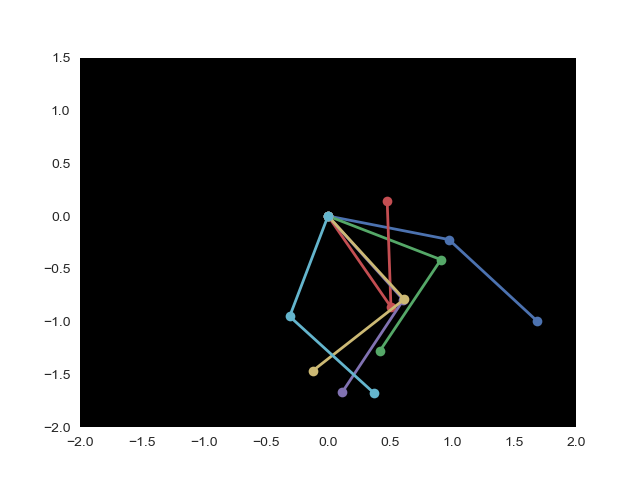

In [70]:
# ax values
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 1.5))

linea, = ax.plot([], [], 'o-', lw=2)
lineb, = ax.plot([], [], 'o-', lw=2)
linec, = ax.plot([], [], 'o-', lw=2)
lined, = ax.plot([], [], 'o-', lw=2)
linee, = ax.plot([], [], 'o-', lw=2)
linef, = ax.plot([], [], 'o-', lw=2)
# initial state
def inita():
    linea.set_data([], [])
    return linea
def initb():
    lineb.set_data([], [])
    return lineb
def initc():
    linec.set_data([], [])
    return linec
def initd():
    lined.set_data([], [])
    return lined
def inite():
    linee.set_data([], [])
    return linee
def initf():
    linef.set_data([], [])
    return linef
# animation by i parameter with x & y
def animatea(i):
    exesa = [0, x1a[i], x2a[i]]
    yesesa = [0, y1a[i], y2a[i]]
    linea.set_data(exesa, yesesa)
    return linea
def animateb(i):
    exesb = [0, x1b[i], x2b[i]]
    yesesb = [0, y1b[i], y2b[i]]
    lineb.set_data(exesb, yesesb)
    return lineb
def animatec(i):
    exesc = [0, x1c[i], x2c[i]]
    yesesc = [0, y1c[i], y2c[i]]
    linec.set_data(exesc, yesesc)
    return linec
def animated(i):
    exesd = [0, x1d[i], x2d[i]]
    yesesd = [0, y1d[i], y2d[i]]
    lined.set_data(exesd, yesesd)
    return lined
def animatee(i):
    exese = [0, x1e[i], x2e[i]]
    yesese = [0, y1e[i], y2e[i]]
    linee.set_data(exese, yesese)
    return linee
def animatef(i):
    exesf = [0, x1f[i], x2f[i]]
    yesesf = [0, y1f[i], y2f[i]]
    linef.set_data(exesf, yesesf)
    return linef

#ani = animation.FuncAnimation(fig, animate, np.arange(1, len(yen)),interval=25, blit=True, init_func=init)
ania = animation.FuncAnimation(fig, animatea,frames=500,interval=40, blit=True, init_func=inita)
anib = animation.FuncAnimation(fig, animateb,frames=500,interval=40, blit=True, init_func=initb)
anic = animation.FuncAnimation(fig, animatec,frames=500,interval=40, blit=True, init_func=initc)
anid = animation.FuncAnimation(fig, animated,frames=500,interval=40, blit=True, init_func=initd)
anie = animation.FuncAnimation(fig, animatee,frames=500,interval=40, blit=True, init_func=inite)
anif = animation.FuncAnimation(fig, animatef,frames=500,interval=40, blit=True, init_func=initf)
plt.show()